In [0]:
# load libraris 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import platform #운영 체제 
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

    
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Feature Selection
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

#Multicolinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Regression statsmodel
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import time

C:\Users\sundooedu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


#### Data Loading

In [0]:
df = pd.read_csv('../projectdata/onion_columns_all_merge_final.csv')

df=df.iloc[:,3:]
df

,10a당 생산량 (kg),평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
0,7163,23.338710,24.974194,22.696667,18.777419,11.066667,5.390323,2.954839,5.782143,7.812903,...,0.006,0.26250,11.283000,15.933500,8.850500,3.274000,3.044500,0.016500,36.433500,0.644500
1,7393,25.225806,27.877419,24.143333,18.245161,11.280000,5.177419,-0.677419,6.114286,7.200000,...,0.007,0.26250,9.805500,12.074500,7.564500,2.942000,3.077000,0.020500,40.263000,0.423500
2,6303,25.083871,25.783871,23.286667,17.570968,14.080000,4.429032,2.832258,2.762069,8.274194,...,0.006,0.03655,11.999208,12.884742,7.380313,3.283697,3.314846,0.014766,37.487552,0.083297
3,8265,25.525806,27.519355,22.160000,17.777419,10.106667,2.929032,2.538710,4.700000,10.203226,...,0.008,0.04650,11.723000,10.608000,7.665000,3.269500,3.149500,0.013500,39.935000,0.070000
4,7271,26.080645,27.961290,23.683333,18.941935,10.900000,5.435484,4.958065,5.835714,9.822581,...,0.007,0.08350,9.375500,11.165000,8.787500,3.269500,3.224500,0.016500,41.049500,0.068000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,7220,20.651220,21.475000,18.195833,14.800000,10.260870,6.157258,5.483607,5.778182,8.078226,...,0.003,0.11150,9.375500,10.639500,6.239000,2.824000,3.224500,0.010500,39.956000,0.068000
140,6552,18.645161,18.758065,17.715000,14.670732,10.738333,5.523387,5.813223,5.457143,7.720968,...,0.003,0.07400,11.724500,11.046500,6.239000,2.862000,3.263000,0.027000,47.105500,0.084000
141,6458,18.095902,18.799194,15.954167,14.166129,11.287500,7.399194,4.473387,5.337931,7.605645,...,0.004,0.07200,12.352000,9.861000,8.147000,2.749000,3.126000,0.009500,47.105500,0.078000
142,6945,25.326804,27.969892,23.692222,20.630952,13.033333,9.794624,6.861290,7.041667,9.821505,...,0.003,0.07200,12.878000,8.801500,7.114500,2.556000,3.179000,0.019000,42.516000,0.044000


#### Data Scaling

In [0]:
# Scaling 
df_columns = df.columns.tolist()

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df_columns)

In [0]:
# IV(변수)와 DV(생산량)로 나누기  
X_scaled = df_scaled.iloc[:,1:]
y_scaled = df_scaled.iloc[:,0]

In [0]:
# 다중공선성 가능성 확인 1.Correlation 
corr = pd.DataFrame(X_scaled.corr())
corr[(corr > 0.9) & (corr <1)].stack().reset_index()

,level_0,level_1,0
0,평균기온 7월,최고기온 7월,0.936627
1,평균기온 7월,최저기온 7월,0.930684
2,평균기온 8월,최고기온 8월,0.957738
3,평균기온 8월,최저기온 8월,0.945941
4,평균기온 10월,최저기온 10월,0.939690
...,...,...,...
195,수소이온농도 pH,비소 As,0.946884
196,수소이온농도 pH,아연 Zn,0.961013
197,아연 Zn,구리 Cu,0.936545
198,아연 Zn,니켈 Ni,0.913759


In [0]:
# 다중공선성 확인 2.VIF 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif.sort_values('VIF Factor')

C:\Users\sundooedu\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\sundooedu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,inf,평균기온 7월
122,inf,9월 일산화탄소
123,inf,10월 일산화탄소
124,inf,11월 일산화탄소
125,inf,12월 일산화탄소
...,...,...
97,NaN,적설량 8월
98,NaN,적설량 9월
99,NaN,적설량 10월
106,NaN,적설량 5월


#### Factor Analysis  적용 가능 여부 판단 -  (생략?)

In [0]:
#모든 값이 0인 컬럼: ['적설량 7월', '적설량 8월', '적설량 9월', '적설량 10월', '적설량 5월', '적설량 6월'] 제거 
zeros = []
for i in X_scaled.columns.tolist():
    if X_scaled[i].mean() == 0:
        zeros.append(i)
        
print(zeros)

['적설량 7월', '적설량 8월', '적설량 9월', '적설량 10월', '적설량 5월', '적설량 6월']


In [0]:
for i in zeros:
    X_scaled.drop(i,axis=1, inplace=True)

C:\Users\sundooedu\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X_scaled)
kmo_model

nan

In [0]:
# Adequency Test: p-value should be less than 0.05 (statistically significant)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X_scaled)
chi_square_value, p_value

C:\Users\sundooedu\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\sundooedu\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1074: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


(inf, nan)

In [0]:
corr = pd.DataFrame(X_scaled.corr())
corr

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,6월 아황산가스,6가크롬 Cr6+,구리 Cu,납 Pb,니켈 Ni,비소 As,수소이온농도 pH,수은 Hg,아연 Zn,카드뮴 Cd
평균기온 7월,1.000000,0.870400,0.705751,0.293718,-0.028876,-0.098918,-0.006441,0.026347,0.372685,0.482809,...,-0.008449,0.136877,0.242111,0.119641,0.270373,0.234370,0.263492,0.101844,0.232877,-0.137716
평균기온 8월,0.870400,1.000000,0.761597,0.414402,-0.040702,0.073979,-0.003654,0.150191,0.323674,0.430261,...,0.056687,0.123132,0.186497,0.115473,0.211853,0.171504,0.165646,0.034493,0.156098,-0.032995
평균기온 9월,0.705751,0.761597,1.000000,0.735049,0.293795,0.283086,0.221679,0.369903,0.376666,0.470969,...,0.218564,0.233261,0.108460,0.214894,0.121501,0.159869,0.144981,0.054023,0.068646,0.184816
평균기온 10월,0.293718,0.414402,0.735049,1.000000,0.506036,0.678747,0.595644,0.689300,0.633801,0.571824,...,0.324739,0.155600,0.132101,0.061626,0.100982,0.060687,0.086202,-0.004638,0.100023,0.035160
평균기온 11월,-0.028876,-0.040702,0.293795,0.506036,1.000000,0.722549,0.697501,0.601360,0.559736,0.426198,...,0.257645,-0.094021,0.006992,0.046618,-0.006945,0.048381,0.056639,0.151157,0.054348,-0.038213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
비소 As,0.234370,0.171504,0.159869,0.060687,0.048381,0.008612,0.051610,0.135309,0.163546,0.110169,...,-0.100111,0.501686,0.851565,0.875182,0.876153,1.000000,0.946884,0.671006,0.887290,0.331386
수소이온농도 pH,0.263492,0.165646,0.144981,0.086202,0.056639,0.048198,0.101611,0.127610,0.254617,0.259672,...,-0.139033,0.440018,0.917495,0.786689,0.924459,0.946884,1.000000,0.723218,0.961013,0.202286
수은 Hg,0.101844,0.034493,0.054023,-0.004638,0.151157,0.024427,-0.057929,0.037311,0.096402,0.155953,...,-0.120573,0.302192,0.683480,0.643598,0.682381,0.671006,0.723218,1.000000,0.706717,0.284972
아연 Zn,0.232877,0.156098,0.068646,0.100023,0.054348,0.113786,0.136745,0.156055,0.310421,0.328769,...,-0.163661,0.448639,0.936545,0.708848,0.913759,0.887290,0.961013,0.706717,1.000000,0.084143


#### Factor Analyzer

In [0]:
fa = FactorAnalyzer(n_factors=11,  rotation=None)

In [0]:
fa.fit(X_scaled)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=11, rotation=None, rotation_kwargs={},
               use_smc=True)

In [0]:
ev, v =fa.get_eigenvalues()
ev = pd.DataFrame(ev)

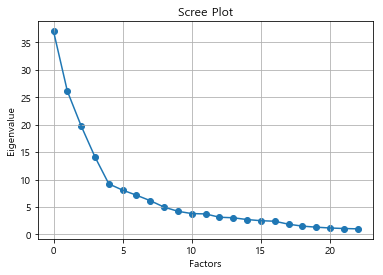

In [0]:
ev1 = ev[ev[0] >= 1]
plt.scatter(range(0,len(ev1)),ev1)
plt.plot(range(0,len(ev1)),ev1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [0]:
fa = FactorAnalyzer(n_factors=11,  rotation=None)
fa.fit(X_scaled)
fa.get_factor_variance()

(array([36.82428841, 25.93811432, 19.56314952, 13.91782077,  8.96131452,
         7.81771696,  6.90168814,  5.83933302,  4.66265498,  3.93975844,
         3.51839732]),
 array([0.20122562, 0.14173833, 0.10690246, 0.07605367, 0.04896893,
        0.04271976, 0.03771414, 0.03190892, 0.02547899, 0.02152873,
        0.01922621]),
 array([0.20122562, 0.34296395, 0.44986641, 0.52592007, 0.574889  ,
        0.61760877, 0.65532291, 0.68723183, 0.71271082, 0.73423956,
        0.75346577]))

In [0]:
variable = X_scaled.columns.tolist()
factor_df = pd.DataFrame(fa.loadings_, index=variable)
factor_df

,0,1,2,3,4,5,6,7,8,9,10
평균기온 7월,0.063593,0.744195,-0.318395,0.262662,0.102046,0.319324,0.143183,0.020152,-0.133566,-0.031872,0.070619
평균기온 8월,0.138084,0.756271,-0.195995,0.212694,0.066189,0.401294,-0.033264,-0.110092,0.045877,-0.072430,0.149870
평균기온 9월,0.357234,0.737705,0.064646,0.101229,0.152938,0.295665,-0.199336,0.067287,0.061654,-0.075543,-0.011806
평균기온 10월,0.658959,0.436591,0.222689,0.222780,0.067358,-0.041488,-0.330587,0.061252,0.213515,-0.054500,0.077935
평균기온 11월,0.737196,0.051550,0.264314,0.012672,0.045882,-0.248286,0.088125,0.268253,-0.065958,-0.021321,-0.233053
...,...,...,...,...,...,...,...,...,...,...,...
비소 As,0.012387,0.078212,-0.146326,0.172578,0.823214,-0.021859,0.220168,0.081267,0.114978,0.176751,0.126423
수소이온농도 pH,0.055191,0.069847,-0.239582,0.325824,0.786304,-0.067044,0.224828,0.059989,0.082157,0.204752,0.047487
수은 Hg,0.014191,0.032725,-0.128757,0.117814,0.659960,-0.094467,0.159753,0.176936,-0.000255,0.107304,-0.161638
아연 Zn,0.088023,0.035014,-0.286916,0.417436,0.718111,-0.125755,0.205972,0.029470,0.091340,0.163571,0.051521


In [0]:
for item in factor_df.columns.tolist():
    print(item, ':', factor_df[factor_df[item]>=0.5].index.values)

0 : ['평균기온 10월' '평균기온 11월' '평균기온 12월' '평균기온 1월' '평균기온 2월' '평균기온 3월' '최고기온 11월'
 '최고기온 12월' '최고기온 1월' '최고기온 2월' '최저기온 9월' '최저기온 10월' '최저기온 11월' '최저기온 12월'
 '최저기온 1월' '최저기온 2월' '최저기온 3월' '최저기온 4월' '최저기온 5월' '일사량 7월' '운량 9월'
 '운량 10월' '운량 11월' '운량 12월' '운량 1월' '운량 2월' '운량 3월' '운량 4월' '운량 5월'
 '운량 6월' '순간최대풍속 7월' '순간최대풍속 8월' '순간최대풍속 9월' '순간최대풍속 10월' '순간최대풍속 12월'
 '순간최대풍속 1월' '순간최대풍속 2월' '9월 오존' '10월 오존' '11월 오존' '12월 오존' '1월 오존'
 '2월 오존' '4월 오존']
1 : ['평균기온 7월' '평균기온 8월' '평균기온 9월' '평균기온 5월' '평균기온 6월' '최고기온 7월' '최고기온 8월'
 '최고기온 9월' '최고기온 10월' '최고기온 4월' '최고기온 5월' '최고기온 6월' '최저기온 7월' '최저기온 8월'
 '최저기온 9월' '최저기온 5월' '최저기온 6월' '일조시간 12월' '일조시간 1월' '일조시간 2월' '일조시간 4월'
 '일사량 12월' '일사량 1월' '일사량 2월' '일사량 6월' '7월 이산화질소' '8월 이산화질소' '9월 이산화질소'
 '10월 이산화질소' '11월 이산화질소' '12월 이산화질소' '1월 이산화질소' '2월 이산화질소' '3월 이산화질소'
 '4월 이산화질소' '5월 이산화질소' '6월 이산화질소']
2 : ['순간최대풍속 10월' '순간최대풍속 11월' '순간최대풍속 12월' '순간최대풍속 1월' '순간최대풍속 3월'
 '7월 미세먼지PM10' '8월 미세먼지PM10' '7월 이산화질소' '5월 이산화질소' '6월 이산화질소' '7월 아황산가스'
 '8월 아황산가스' '9월 아

In [0]:
X_fc = pd.DataFrame(fa.transform(X_scaled))

## MODELING

#### Train_test_split 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_fc, y_scaled, test_size=0.2, random_state=0)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(115, 11)
(29, 11)
(115,)
(29,)


#### 1.Linear Regression

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

In [0]:
#MSE, RMSE 
print('Training MAE:', mean_absolute_error(y_train, y_train_pred))  
print('Training MSE:', mean_squared_error(y_train, y_train_pred))  
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('\nTest MAE:', mean_absolute_error(y_test, y_pred))  
print('Test MSE:',mean_squared_error(y_test, y_pred))  
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

#R-squared 
print('\nTraining R:', r2_score(y_train,y_train_pred))
print('Test R:', r2_score(y_test,y_pred))

#Adjusted Test R-squared 
SS_Residual = sum((y_test-y_pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print ('\nR-squared:' ,r_squared, '\nAdjusted R-squared:',adjusted_r_squared)

Training MAE: 0.11406240299084518
Training MSE: 0.019780145133884753
Training RMSE: 0.14064190390450762

Test MAE: 0.12123826444930251
Test MSE: 0.022663487268090605
Test RMSE: 0.15054397121137267

Training R: 0.46628078412116913
Test R: 0.2446619832817455

R-squared: 0.24466198328174538 
Adjusted R-squared: -0.24408614518300764


#### Factor 개수별 Regression model 결과 

In [0]:
for i in range(6,23):
    fa = FactorAnalyzer(n_factors=i,  rotation=None)
    fa.fit(X_scaled)
    X_fc = pd.DataFrame(fa.transform(X_scaled))

    X_train, X_test, y_train, y_test = train_test_split(X_fc, y_scaled, test_size=0.2, random_state=0)

    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    
    print('\n# of factors: %s' %i)
    #Metrics 
    print('Test MAE:', mean_absolute_error(y_test, y_pred))  
    print('Test MSE:',mean_squared_error(y_test, y_pred))  
    print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

    #Adjusted Test R-squared 
    SS_Residual = sum((y_test-y_pred)**2)       
    SS_Total = sum((y_test-np.mean(y_test))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print ('R-squared:' ,r_squared, '\nAdjusted R-squared:',adjusted_r_squared)


# of factors: 6
Test MAE: 0.13339977865291563
Test MSE: 0.02475807240324447
Test RMSE: 0.15734698091556912
R-squared: 0.17485278917496638 
Adjusted R-squared: -0.05018735923186113

# of factors: 7
Test MAE: 0.12348903819631478
Test MSE: 0.021402035569663386
Test RMSE: 0.14629434565171473
R-squared: 0.28670416385196296 
Adjusted R-squared: 0.04893888513595057

# of factors: 8
Test MAE: 0.13331773313378553
Test MSE: 0.024943644078480688
Test RMSE: 0.15793556938980113
R-squared: 0.16866798012621198 
Adjusted R-squared: -0.16386482782330325

# of factors: 9
Test MAE: 0.1212023069509679
Test MSE: 0.021705350699635976
Test RMSE: 0.14732735896511542
R-squared: 0.2765951525597463 
Adjusted R-squared: -0.06607030149090032

# of factors: 10
Test MAE: 0.12372546104634292
Test MSE: 0.022965628717950656
Test RMSE: 0.1515441477522331
R-squared: 0.23459208888261662 
Adjusted R-squared: -0.19063452840481876

# of factors: 11
Test MAE: 0.12123826444930251
Test MSE: 0.022663487268090605
Test RMSE: 0.15